In [147]:
# Import data and libraries
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
from mpl_toolkits.basemap import Basemap
pylab.rcParams['figure.figsize'] = 16, 12
pd.options.display.mpl_style = 'default'
get_ipython().magic(u'matplotlib inline')
import sys 
sys.path.append('../Bmore/')
import ibuttonplots
import importibuttondata
%matplotlib inline

files = glob.glob('./data/*T.csv')
meta0 = pd.DataFrame(pd.read_csv('./data/metaNairobi.csv', sep = ','))
tempDF, anomalyDF, meta = importibuttondata.importdata(files, meta0)

#adjust index to Nairobi local time, as I set the iButtons on local

tempDF.index = tempDF.index+ pd.DateOffset(hours = 8)

In [54]:
#rename files
files = glob.glob('./data/Temp_sensor*.csv')
for file in files: 
    sensorNum = os.path.basename(os.path.splitext(file)[0]).split('r')[1]
    os.rename(file,  './data/'+ sensorNum+'T.csv')

files = glob.glob('./data/RH_sensor*.csv')
for file in files: 
    sensorNum = os.path.basename(os.path.splitext(file)[0]).split('r')[1]
    os.rename(file,  './data/'+sensorNum+'H.csv')

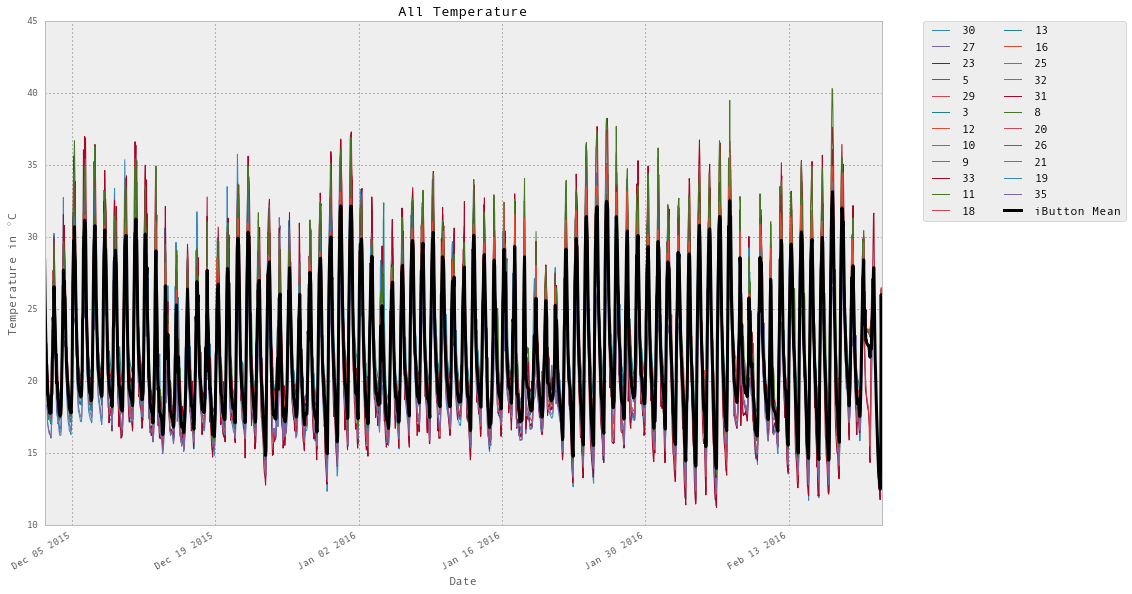

In [58]:
fig = plt.figure(figsize=[15,10])
for column in tempDF: 
    plt.plot(tempDF.index, tempDF[column], label= column)

tempDF.mean(axis=1).plot(style = 'k', label = 'iButton Mean', linewidth = 3)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =2)
plt.title('All Temperature')
plt.ylabel('Temperature in $^\circ $C')

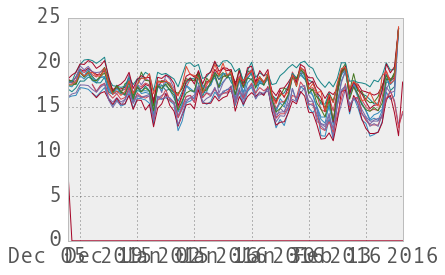

In [109]:
handle = plt.plot(tempDF.resample('D').index, tempDF.resample('D', how='min'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =2)

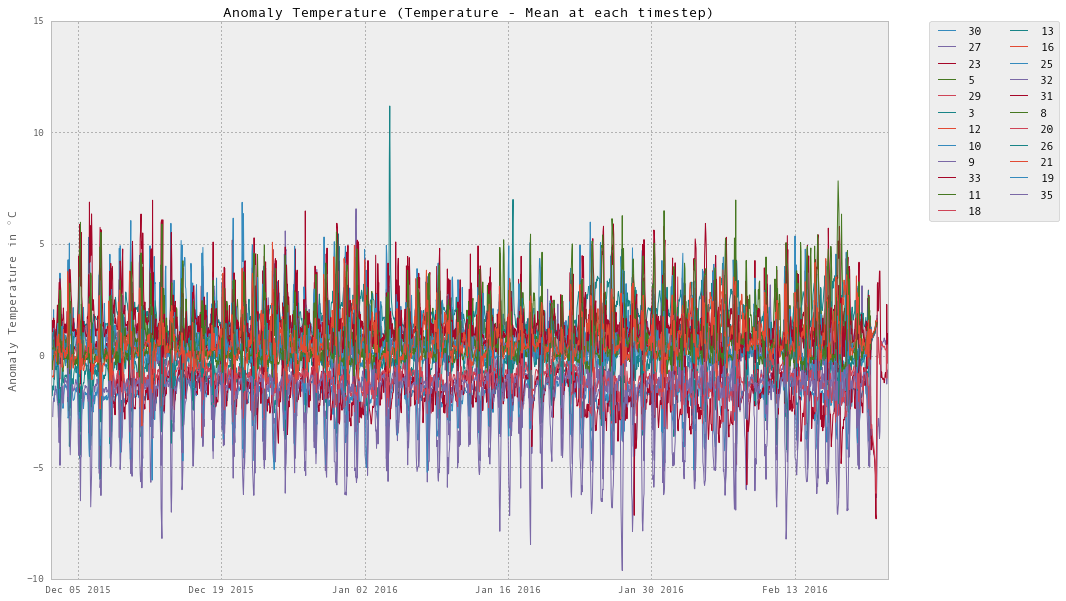

In [59]:
# plot anomaly 
fig = plt.figure(figsize=[15,10])
for column in tempDF: 
    plt.plot(anomalyDF.index, anomalyDF[column], label= column)
#anomalyDF.std(axis=1).plot(style = 'black', alpha = .5, linewidth = 3, label = '+$sigma$')
#(anomalyDF.std(axis=1)*-1).plot(style = 'black', alpha = .5, linewidth = 3, label = '- $\sigma$')
#observations.urban.subtract(observations.rural).plot(style = 'or', label = 'U-R', markersize = 8)

plt.title('Anomaly Temperature (Temperature - Mean at each timestep)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 2)
plt.ylabel('Anomaly Temperature in $^\circ $C')

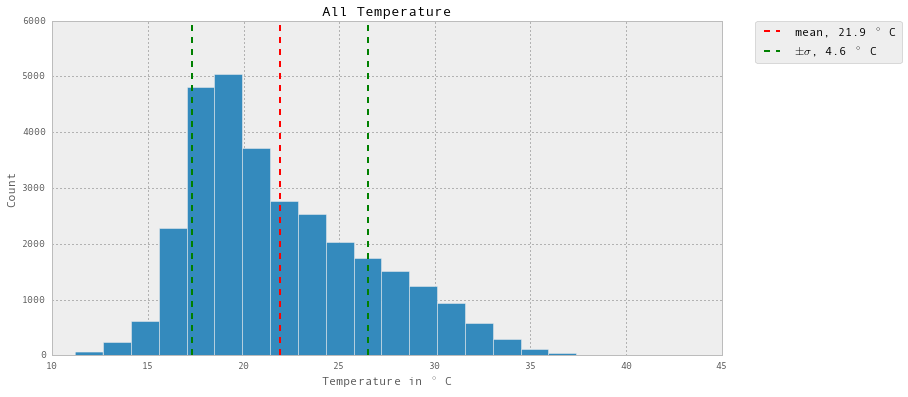

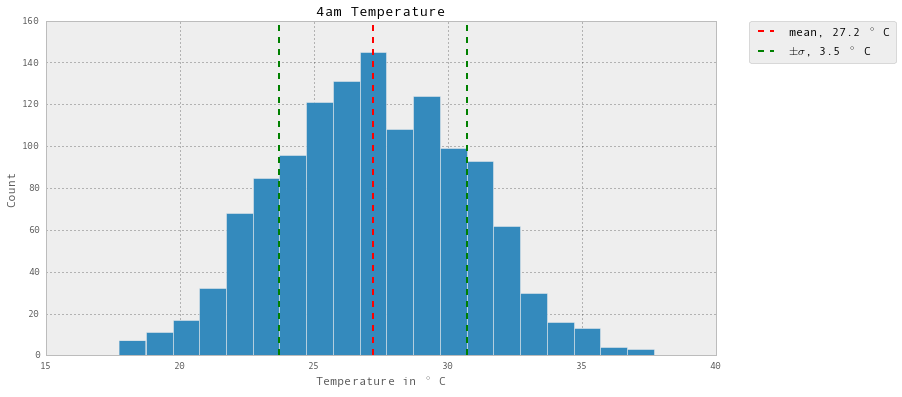

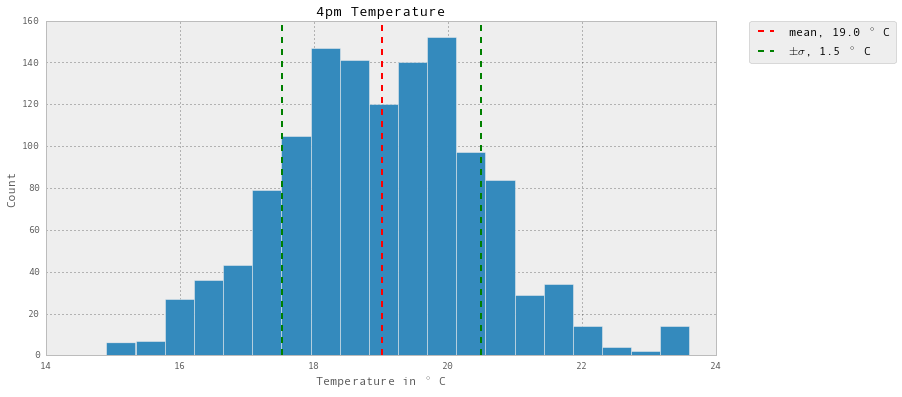

In [61]:
ibuttonplots.histPlot(tempDF, 'All Temperature')
h1, bins1 = ibuttonplots.histPlot(tempDF[tempDF.index.hour == 4], '4am Temperature')
h2, bins2 = ibuttonplots.histPlot(tempDF[tempDF.index.hour == 16], '4pm Temperature')

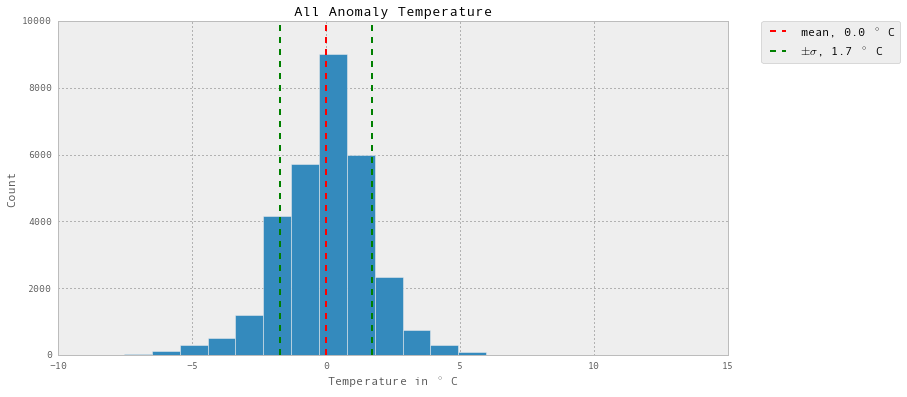

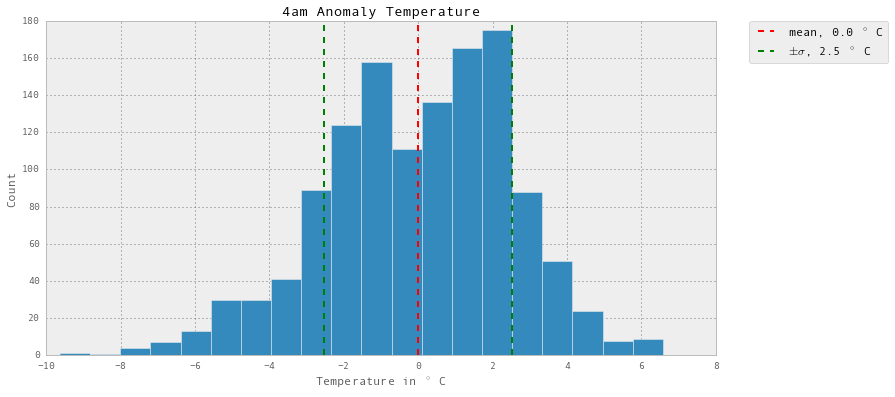

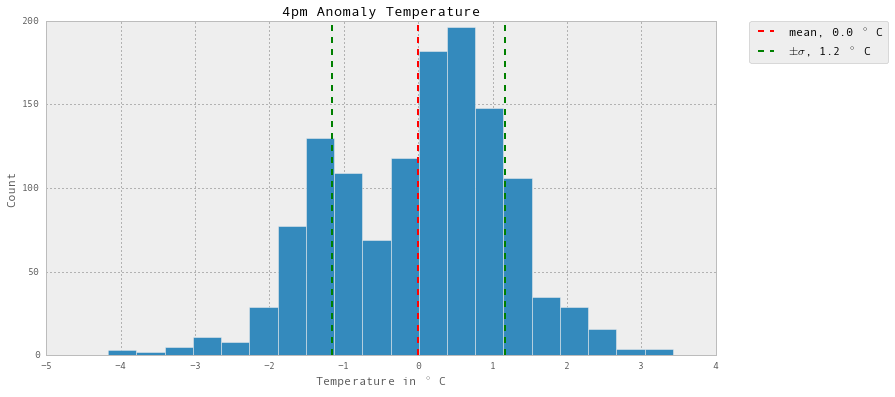

In [62]:
ibuttonplots.histPlot(anomalyDF, 'All Anomaly Temperature')
h1, bins1 = ibuttonplots.histPlot(anomalyDF[anomalyDF.index.hour == 4], '4am Anomaly Temperature')
h2, bins2 = ibuttonplots.histPlot(anomalyDF[anomalyDF.index.hour == 16], '4pm Anomaly Temperature')

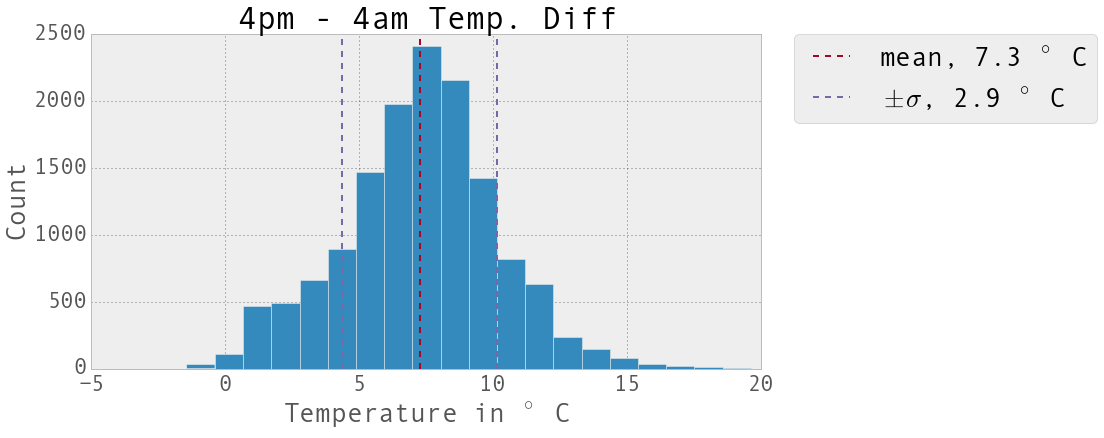

In [101]:
fig  = plt.figure(figsize=(12, 6))
diff = tempDF[tempDF.index.hour == 16][:-1].values - tempDF[tempDF.index.hour == 4].values
data = diff[~np.isnan(diff)]
n, bins, patches = plt.hist(data, 20)

plt.axvline(data.mean(),
                linestyle='dashed',
                color = pd.tools.plotting._get_standard_colors(3)[2],
                linewidth=2,
                label = 'mean, %2.1f $^\circ$ C'%np.nanmean(data),
                alpha = 1.0)

plt.axvline(data.std()+data.mean(),
                color = pd.tools.plotting._get_standard_colors(3)[1],
                linestyle='dashed',
                linewidth=2,
                label = '$\pm \sigma$, %2.1f $^\circ$ C'%np.nanstd(data)
                )

plt.axvline(data.mean()-data.std(),
                color = pd.tools.plotting._get_standard_colors(3)[1],
                linestyle='dashed',
                linewidth=2,
                )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #, ncol = 3)

plt.title('4pm - 4am Temp. Diff')
plt.xlabel('Temperature in $^\circ$ C')
plt.ylabel('Count')

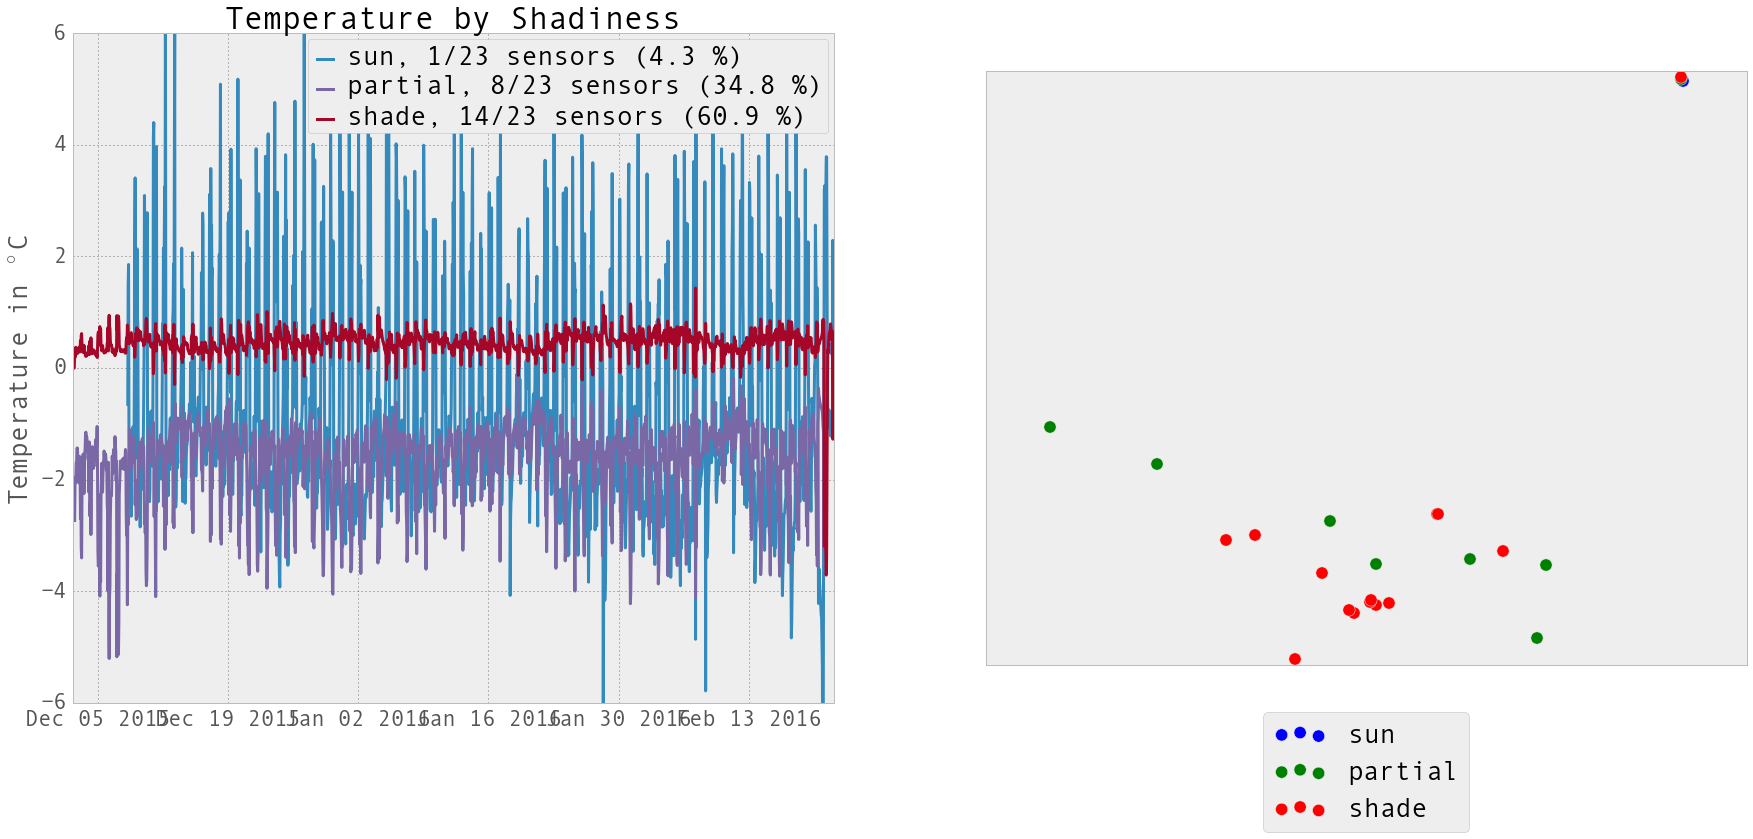

skipping plot Temperature by Attachment


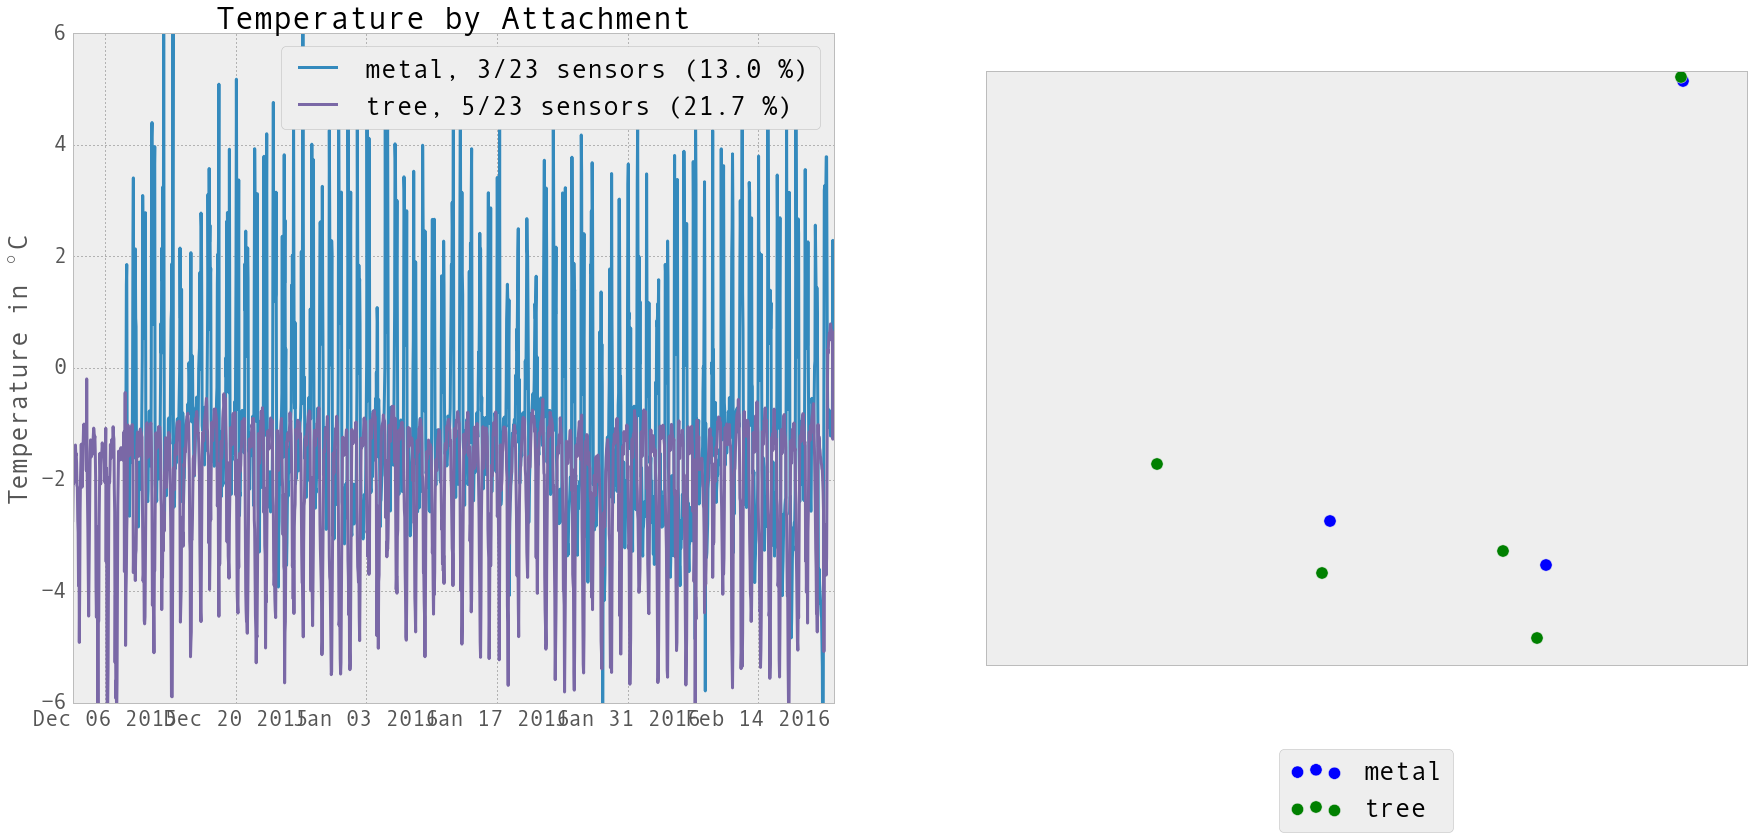

skipping plot Temperature by Land Cover Class


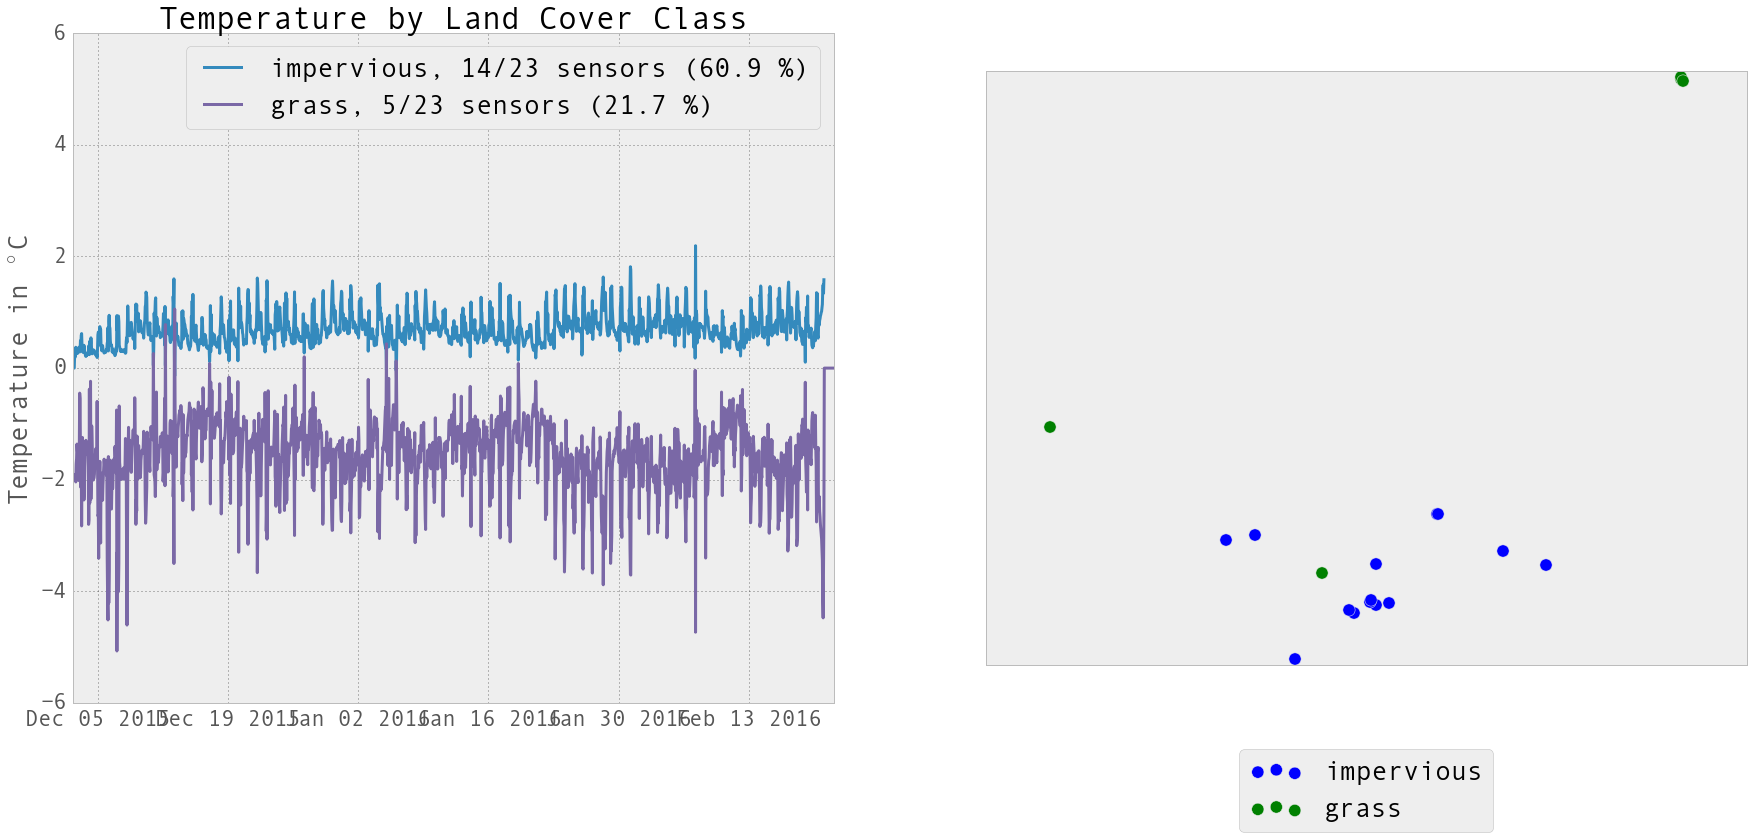

skipping plot Temperature by Shadiness for metal


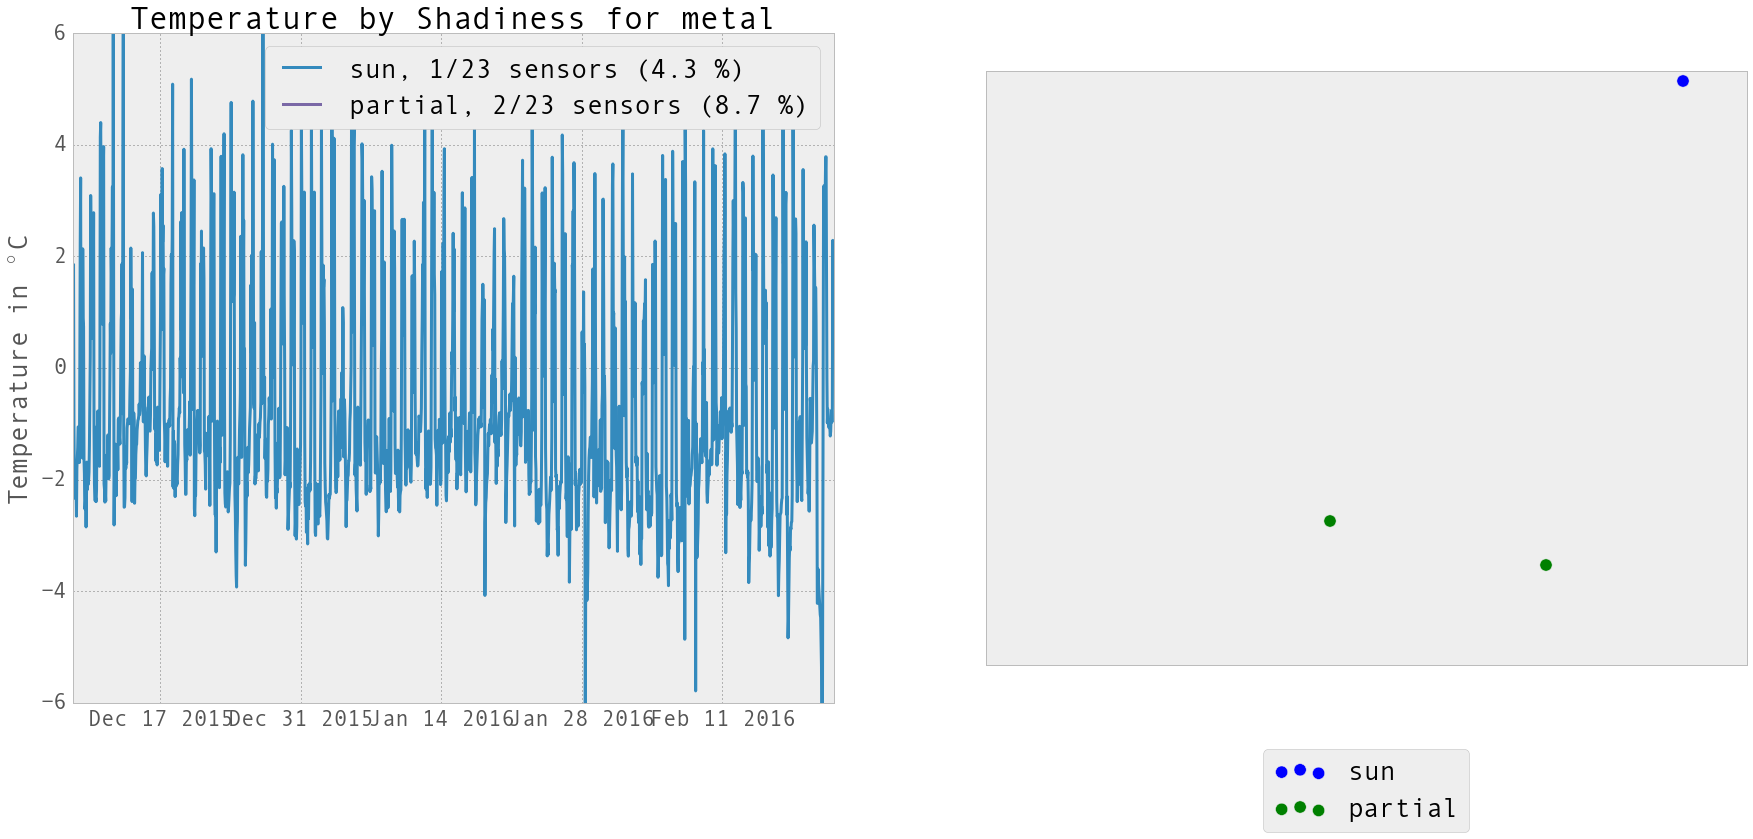

In [63]:
for option in {'landcoverclass', 'sunorshade', 'attachment'} : 
    ibuttonplots.timeseriesplots(anomalyDF,meta,option)
    #plt.savefig('diurnal%s.eps'%option, format = 'eps', dpi = 600)
ibuttonplots.timeseriesplots(anomalyDF, meta,'sunorshade', 'attachment', 'metal')

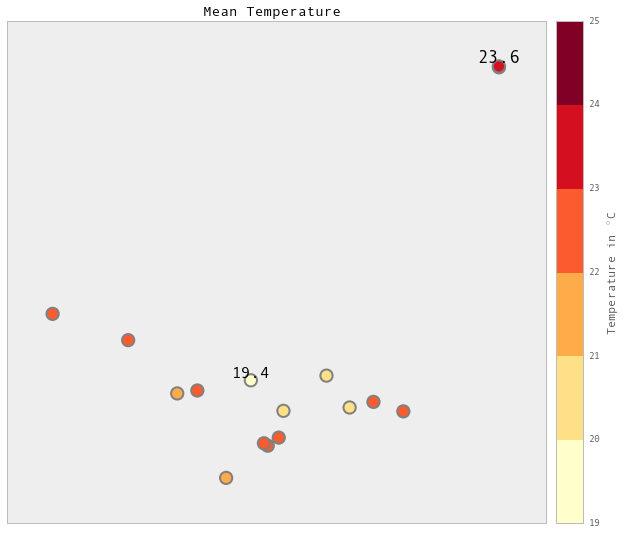

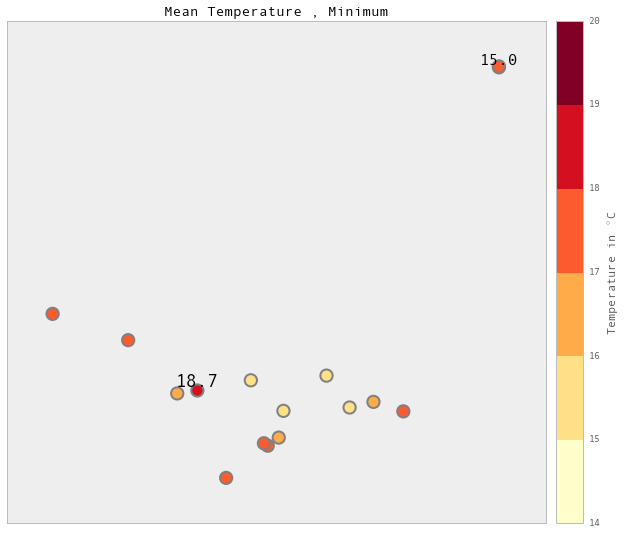

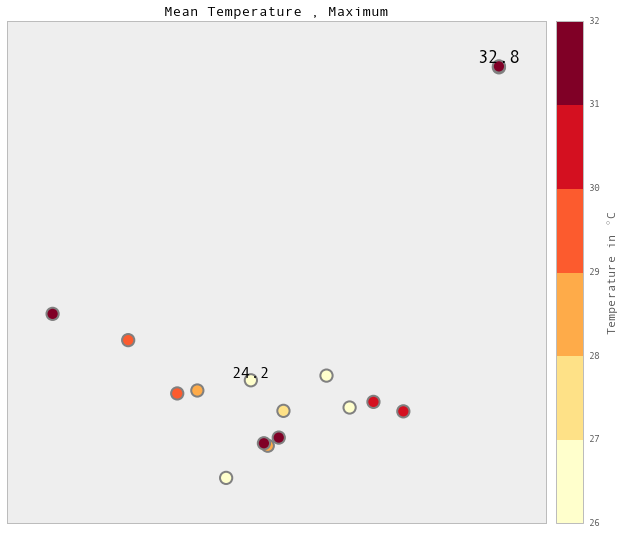

In [127]:
ibuttonplots.mapmean(tempDF, meta)
ibuttonplots.mapmean(tempDF.resample('D', how = 'min'), meta, ', Minimum')
ibuttonplots.mapmean(tempDF.resample('D', how = 'max'), meta, ', Maximum',)

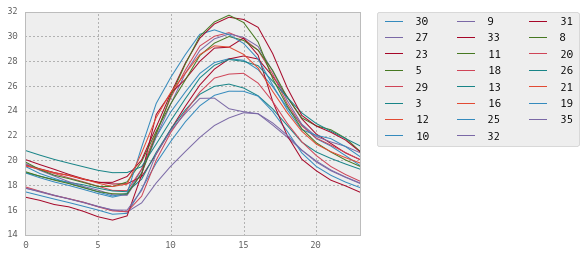

In [148]:
tempDF.groupby(tempDF.index.hour).mean().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 3)

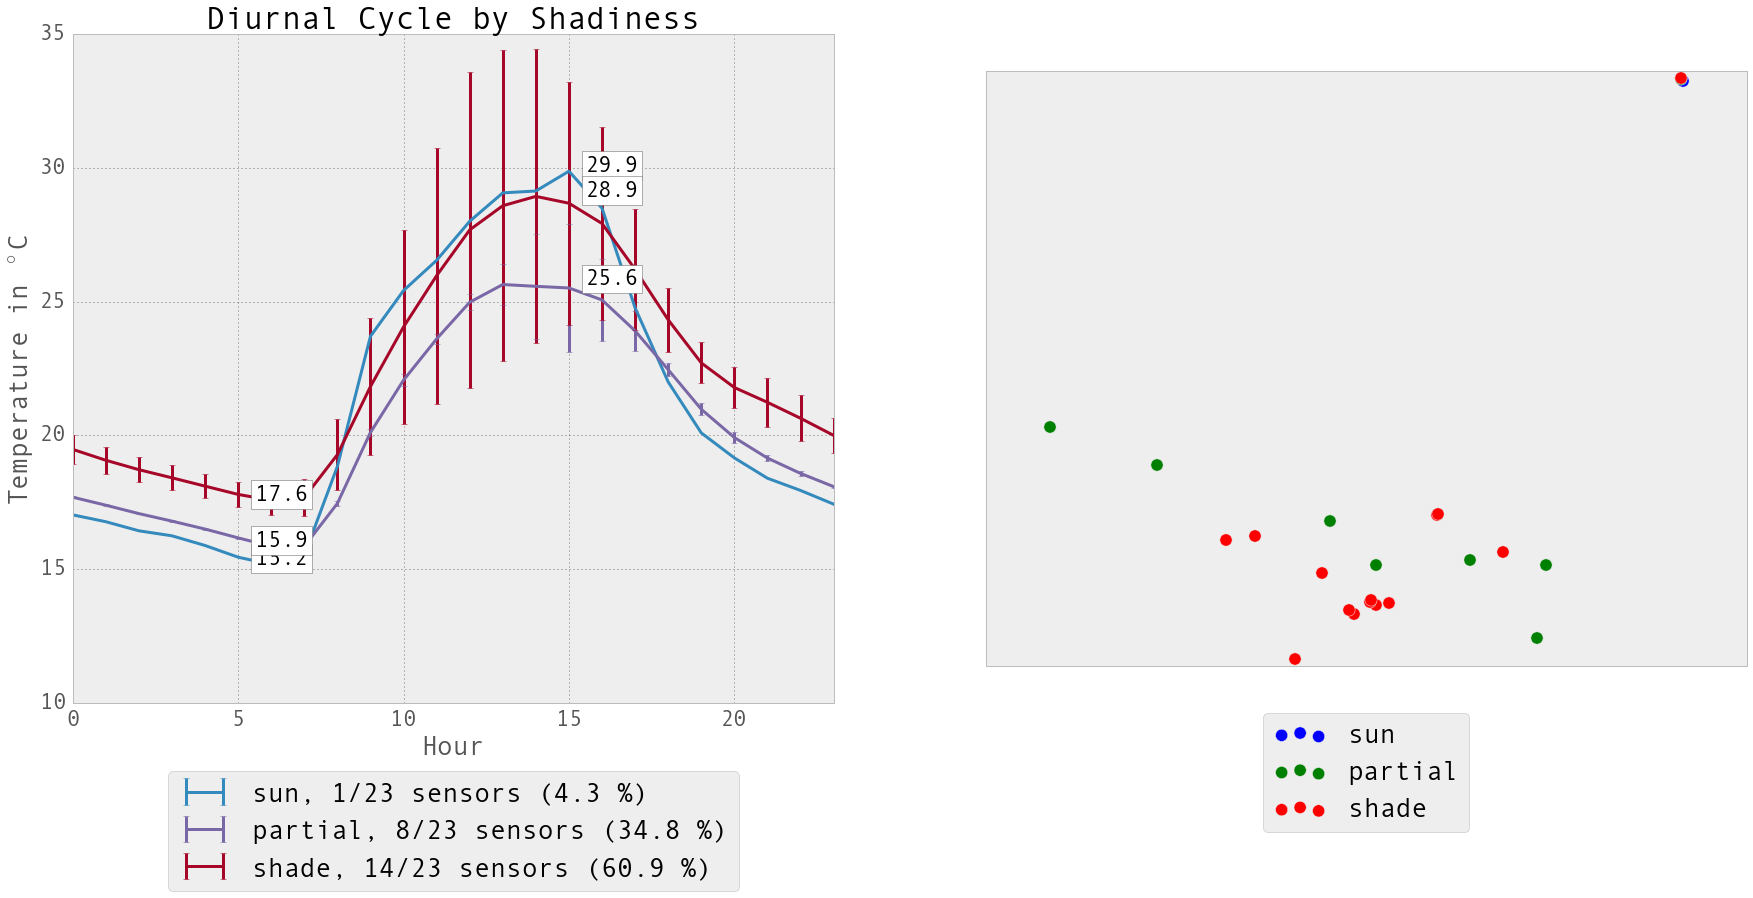

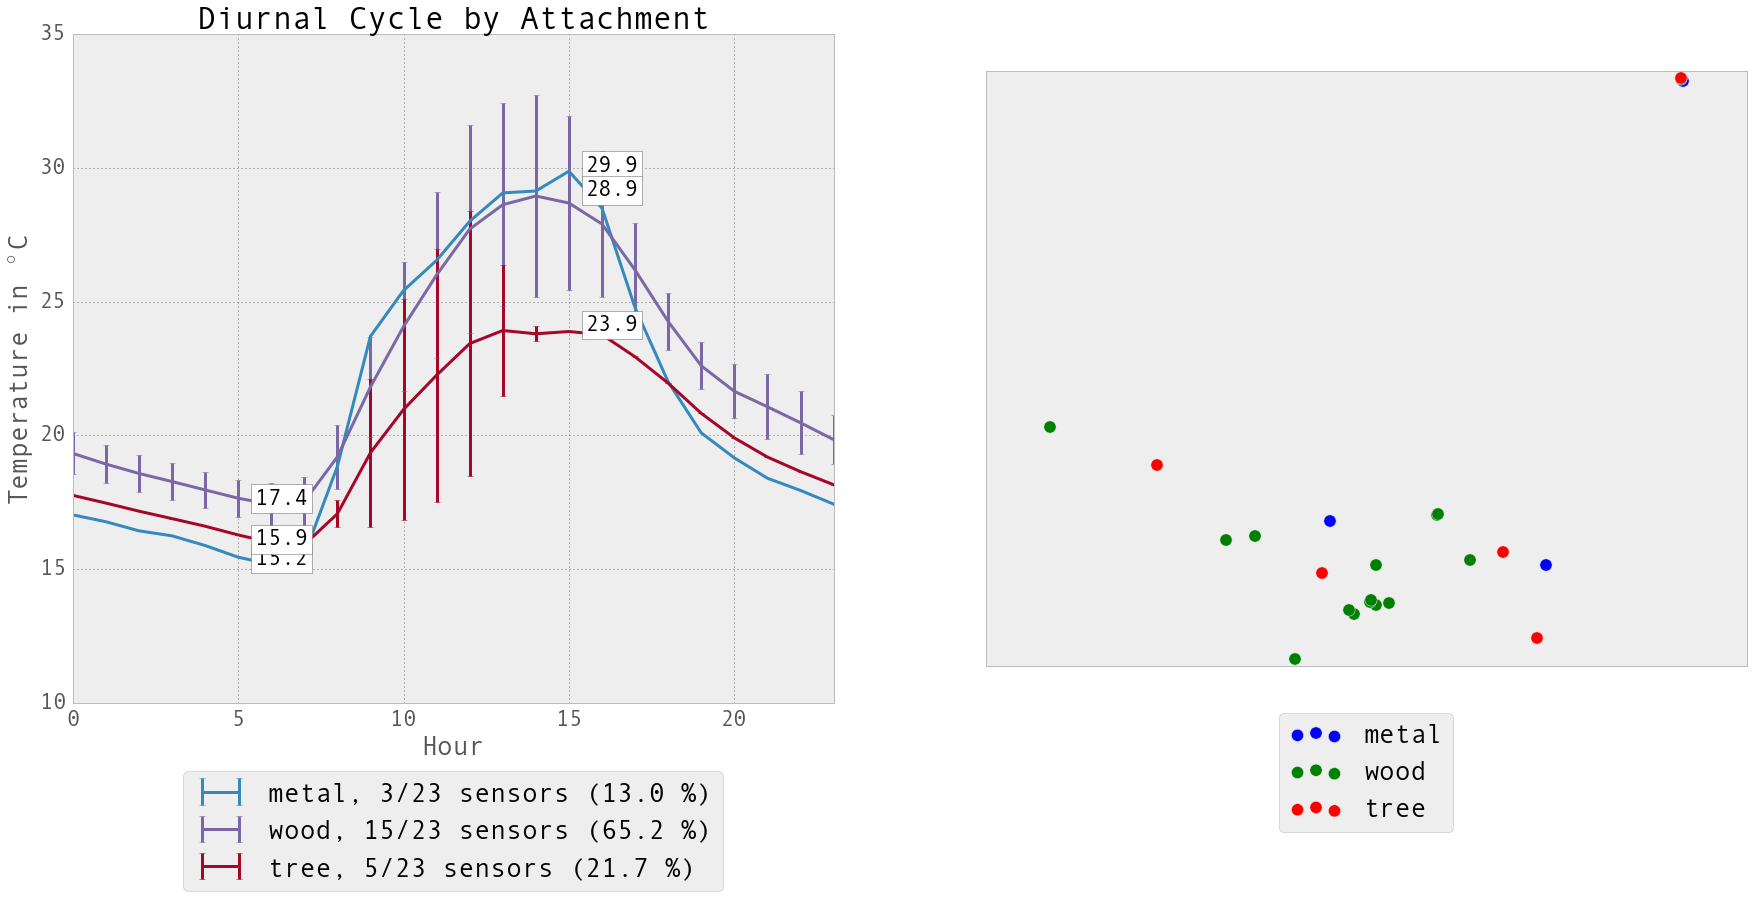

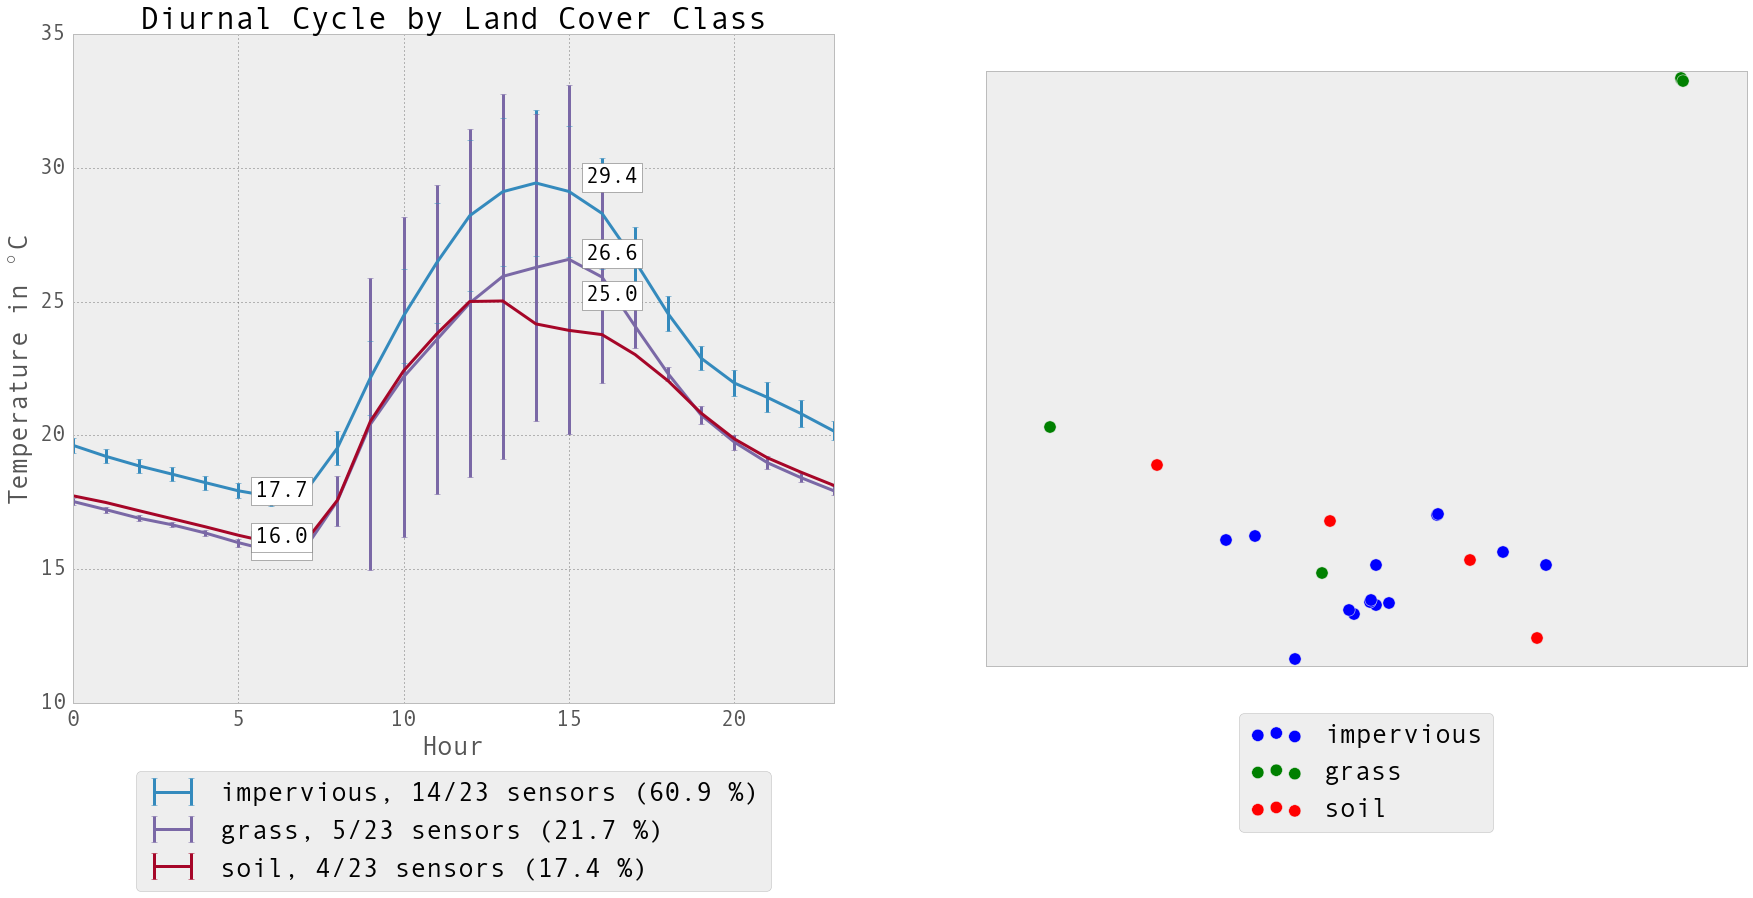

In [149]:
for option in {'landcoverclass', 'sunorshade', 'attachment'} : 
    ibuttonplots.diurnalplots(tempDF,meta, option)

skipping plot Diurnal Cycle by Land Cover Class for sun
skipping plot Diurnal Cycle by Land Cover Class for sun


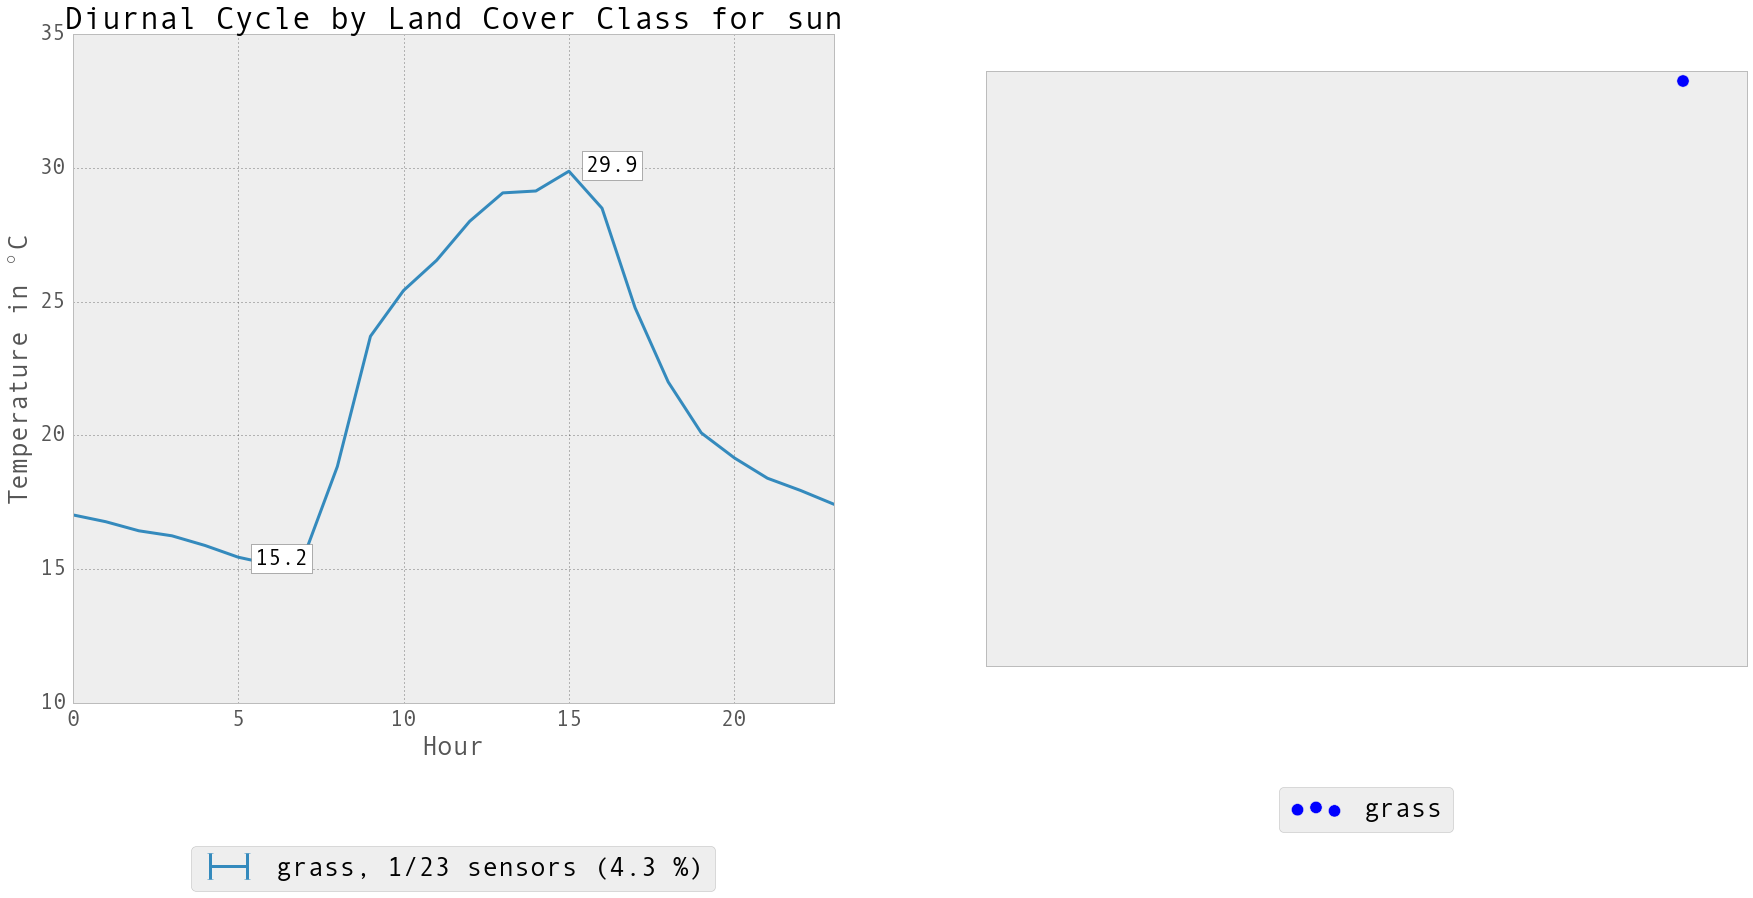

ValueError: posx and posy should be finite values

Error in callback <function post_execute at 0x1062b3398> (for post_execute):


ValueError: posx and posy should be finite values

ValueError: posx and posy should be finite values

In [150]:
for option2 in {'shade', 'partial', 'sun'} : 
    ibuttonplots.diurnalplots(tempDF,meta, 'landcoverclass', 'sunorshade', option2)

In [145]:
reload(ibuttonplots)

<module 'ibuttonplots' from '../Bmore/ibuttonplots.py'>